In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sc
import scipy.stats as st
import seaborn as sns
import scipy

from numpy.linalg import matrix_power
from numpy.linalg import solve

from statsmodels.distributions.empirical_distribution import ECDF

matplotlib.style.use('ggplot')

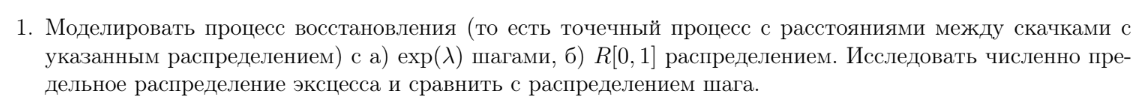

Траектории обоих процессов: 


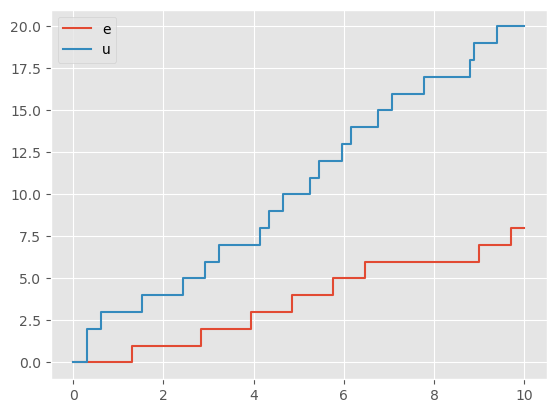

In [90]:
#Процесс восстановления
def plotting(dist, l):
    size = 30
    time = dist.rvs(size=size)
    T = np.linspace(0, 10, 100)
    
    tmp = [time[0]]
    for i in range(1, size):
        tmp.append(tmp[i-1]+time[i])
        
    val = []
    for t in T:
        flag = True
        for j in range(1, len(tmp)):
            if t < tmp[j] and t >= tmp[j-1]:
                val.append(j)
                flag = False
                break
        if flag == True:
            val.append(0)
    plt.step(T, val, label=l)

      
print('Траектории обоих процессов: ')
plotting(st.expon(0.5), 'e')
plotting(st.uniform(0,1), 'u')
plt.legend()

In [59]:
#значение процесса в t
def process(dist, t):
    time = dist.rvs()
    s = 0
    while time <= t:
        s += 1
        time += dist.rvs()
    return s

#ЭФР эксцесса
def modeling(dist, t):
    excess = []
    for i in range(300):
        time = dist.rvs()
        s = 0
        while time <= t:
            s += 1
            time += dist.rvs()

        excess.append(time-t)
    return excess

def counter(excess, x):
    excess = np.array(excess)
    return len(excess[excess <= x])/len(excess)

def plotting(dist, t):
    X = np.linspace(0, 3, 50)
    excess = modeling(dist, t)
    plt.plot(X, [counter(excess, x) for x in X], label='excess')
    plt.plot(X, dist.cdf(X), label='dist')
    plt.legend()

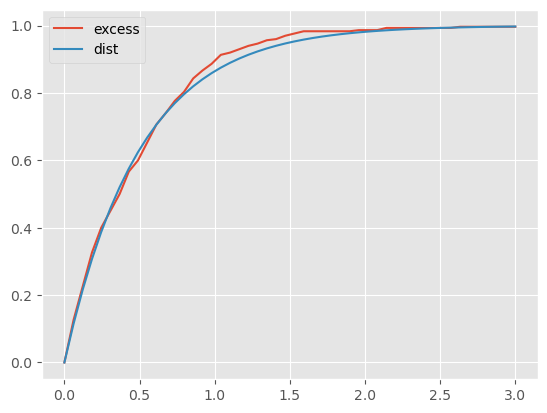

In [61]:
plotting(st.expon(scale=1/2), 10)

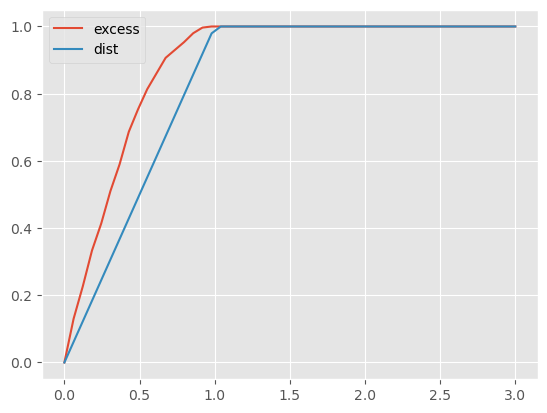

In [63]:
plotting(st.uniform(0, 1), 10)

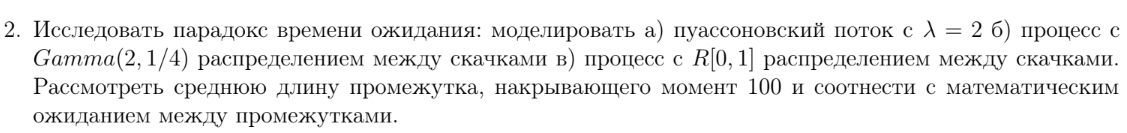

In [132]:
#Процесс восстановления
def plotting(dist, l):
    size = 100
    time = dist.rvs(size=size)
    
    tmp = [time[0]]
    for i in range(1, size):
        tmp.append(tmp[i-1]+time[i])
        
    high = min(50, tmp[-1]) 
    T = np.linspace(0, high-2, 100)
    val = []
    for t in T:
        flag = True
        for j in range(1, len(tmp)):
            if t < tmp[j] and t >= tmp[j-1]:
                val.append(j)
                flag = False
                break
        if flag == True:
            val.append(0)
    plt.step(T, val, label=l)

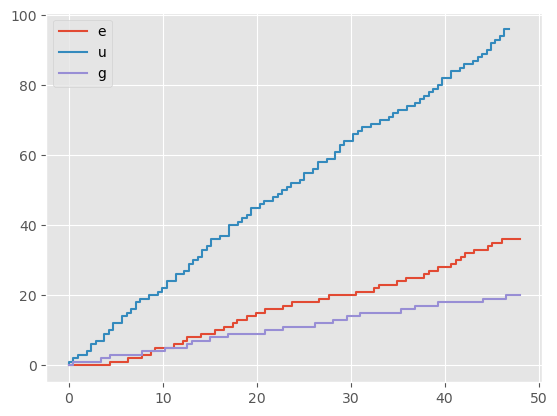

In [145]:
plotting(st.expon(1/2), 'e')
plotting(st.uniform(0,1), 'u')
plotting(st.gamma(2,1/4), 'g')
plt.legend()

In [174]:
#парадокс времени ожидания
def excess(dist):
    T = []
    for i in range(1000):
        time = dist.rvs()
        tmp = None
        while time <= 100:
            tmp = dist.rvs()
            time += tmp
        T.append(tmp)
    T = np.array(T)
    
    return np.mean(T)

print('Экспоненциальное: ', excess(st.expon(scale=1/2)), 'EX = 1/2')
print('Гамма: ', excess(st.gamma(2, scale=1/4)), 'EX = 1/2')
print('Равномерное: ', excess(st.uniform(0, 1)), 'EX = 1/2')

Экспоненциальное:  0.9734160145057335 EX = 1/2
Гамма:  0.7490592555352223 EX = 1/2
Равномерное:  0.6537306765372339 EX = 1/2


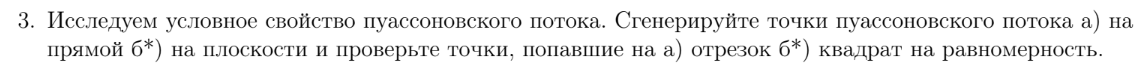

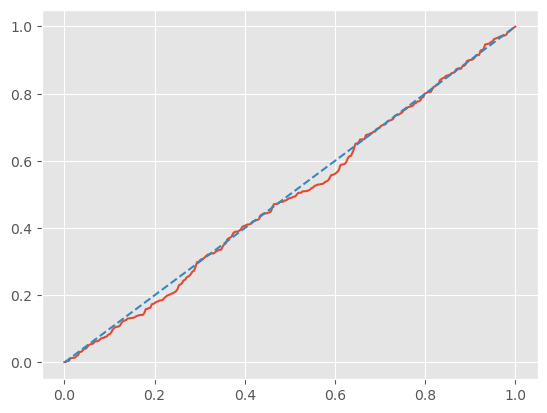

In [207]:
l = 1/2 #параметр
a = 10
b = 70

pvals = []
for i in range(300):
    time = st.expon(scale=1/l).rvs(size=500)

    #массив с точками, попавшими в отрезок
    points = []
    sum_time = time[0]
    if a <= sum_time <= b:
        points.append(sum_time)
    for i in range(1, 500):
        sum_time += time[i]
        if sum_time < a:
            continue
        if sum_time > b:
            break

        #если попали в отрезок - добавляем
        points.append(sum_time)

    #применим критерий и добавим зн. pval
    pvals.append(st.kstest(points, st.uniform(loc=a, scale=b-a).cdf, alternative='two-sided').pvalue)

pvals = np.array(pvals)
plt.plot(np.linspace(0, 1, 300), np.sort(pvals))
plt.plot(np.linspace(0, 1, 300), np.linspace(0, 1, 300), '--')

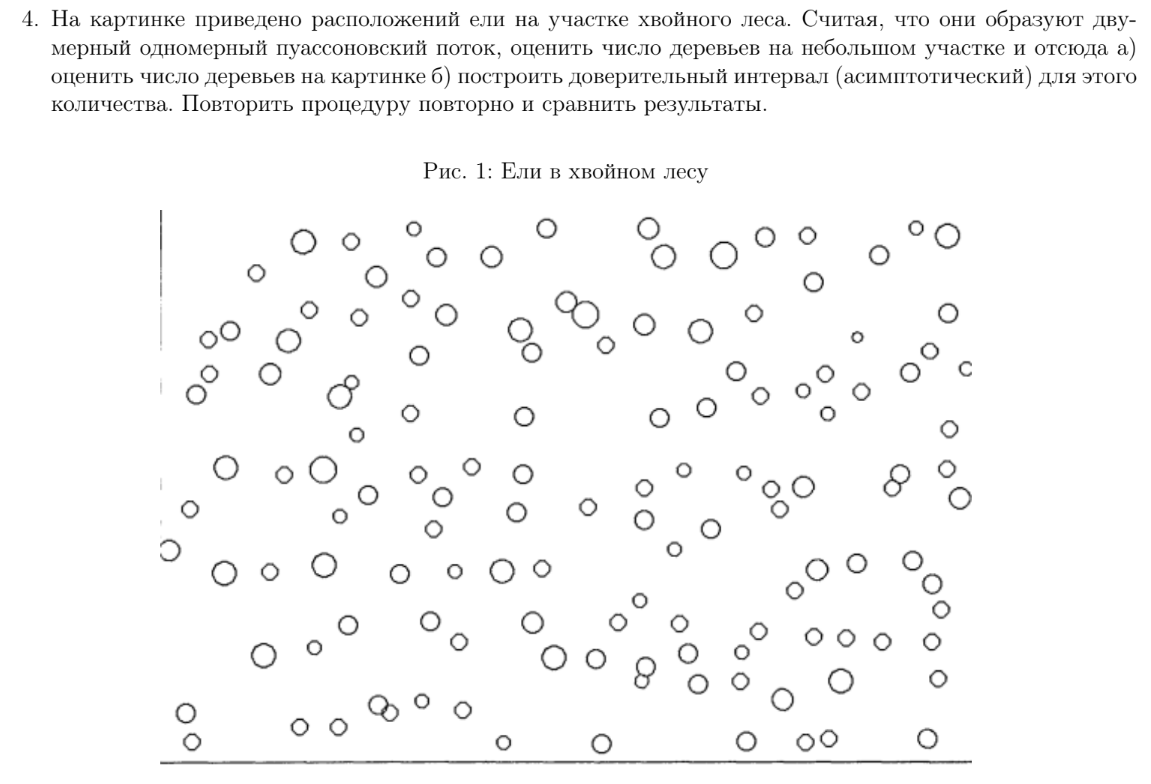

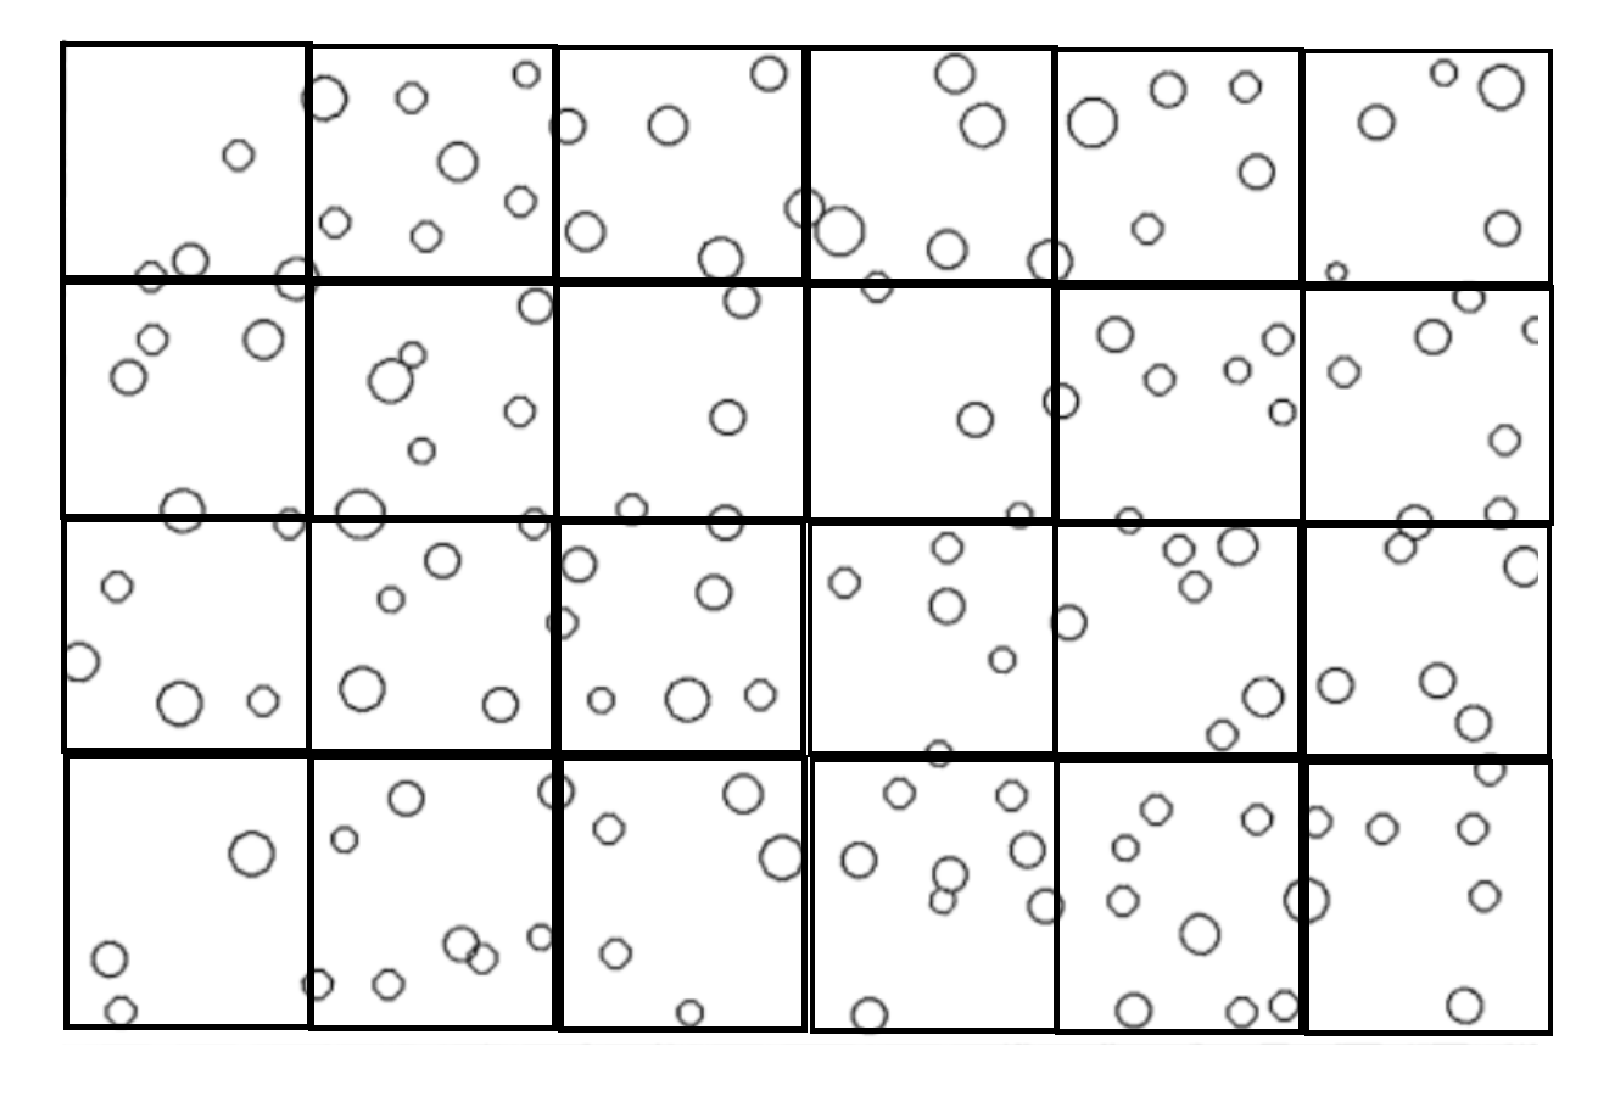

In [20]:
#l = 5, m = 24 (кол-во ячеек)
#(N - m*l)/sqrt(ml) -> N(0, 1)

print(st.norm(0, 1).ppf(0.025)*120**0.5 + 120, -st.norm(0, 1).ppf(0.025)*120**0.5 + 120)

98.52967027539411 141.4703297246059


In [18]:
#l = 4, m = 24 (кол-во ячеек)
#(N - m*l)/sqrt(ml) -> N(0, 1)

print(st.norm(0, 1).ppf(0.025)*96**0.5 + 96, -st.norm(0, 1).ppf(0.025)*96**0.5 + 96)

76.79635329457875 115.20364670542125


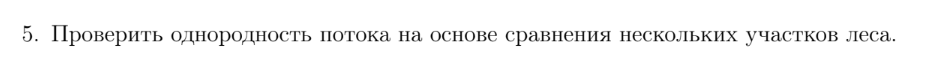

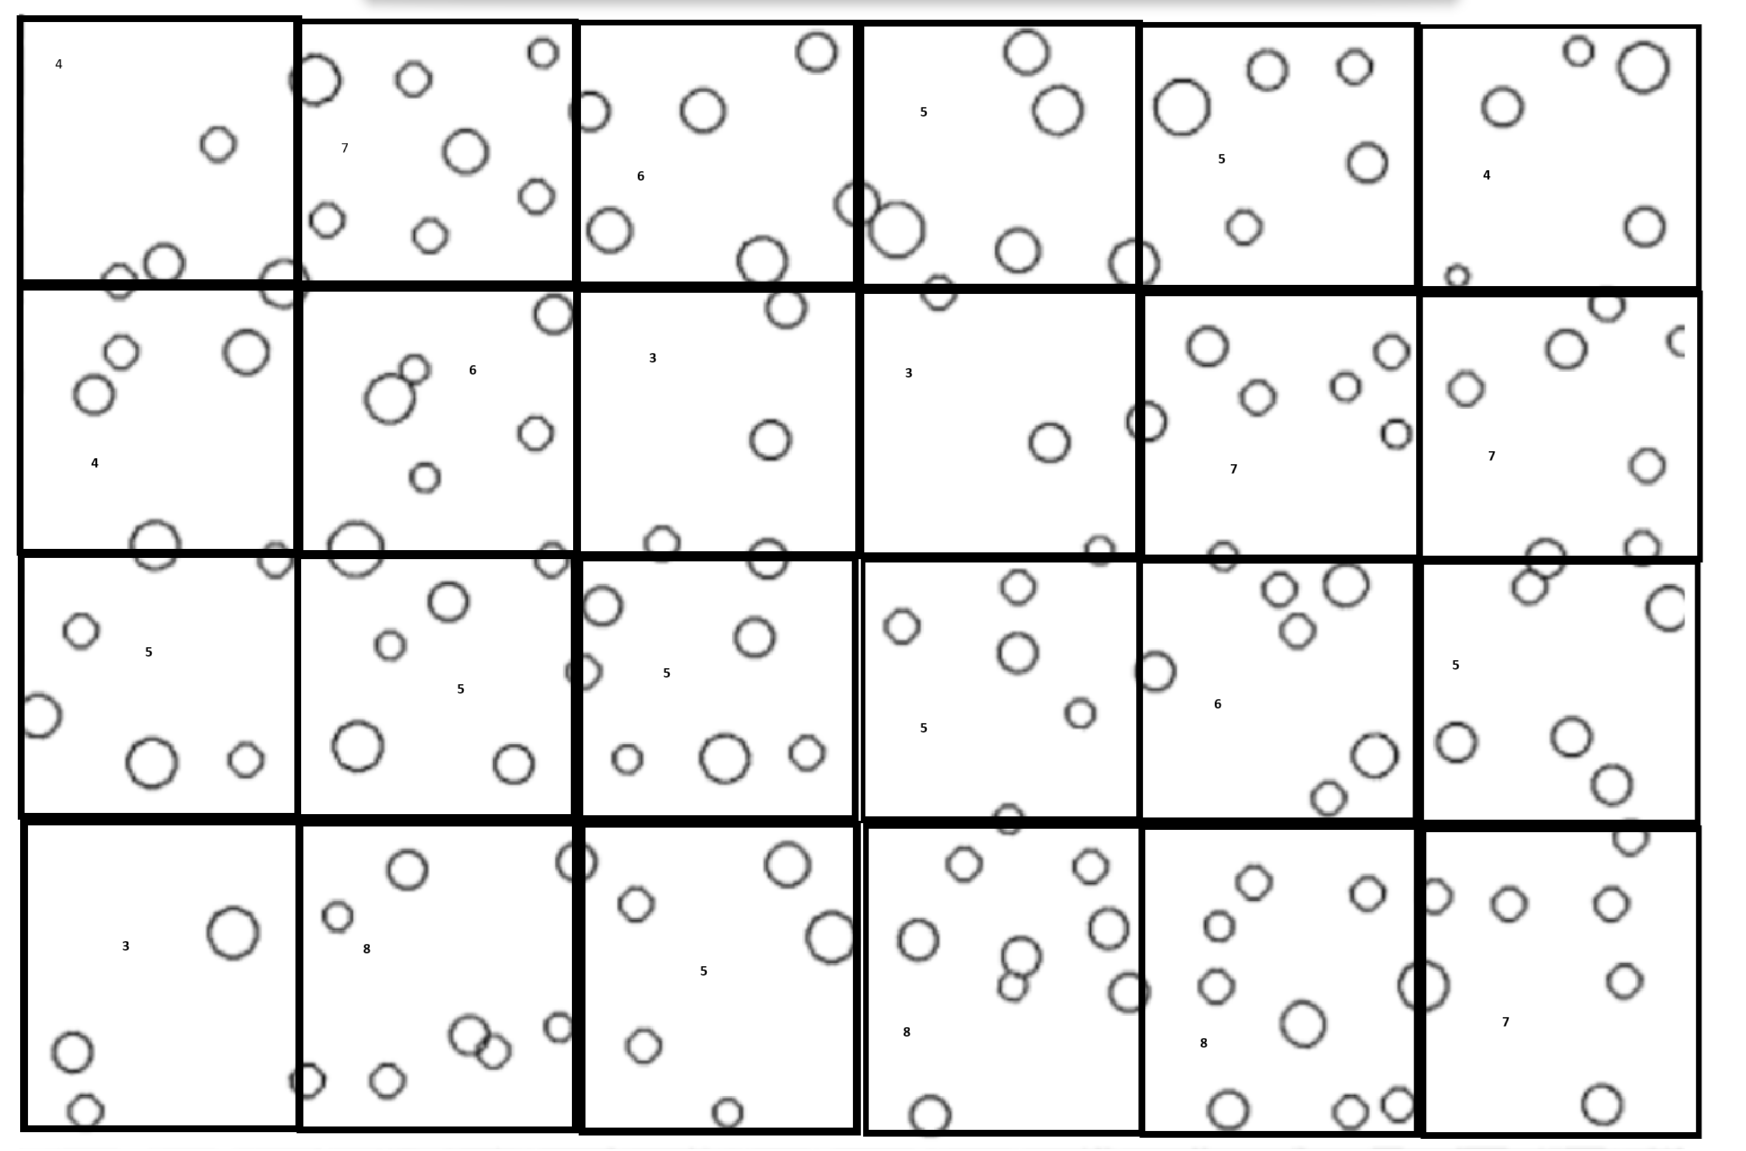

In [45]:
arr = [4, 7, 6, 5, 5, 4, 4, 6, 3, 3, 7, 7, 5, 5, 5, 5, 6, 5, 3, 8, 5, 8, 8, 7]
s = []

#разделим на 4 одинаковые полосы
#проверяем на равномерность
for i in range(4):
    s.append(np.sum(arr[6*i:6*(i+1)])/np.sum(arr))

print(s)
print(st.chisquare(s, [1/4 for i in range(4)]).pvalue)

[0.2366412213740458, 0.22900763358778625, 0.2366412213740458, 0.29770992366412213]
0.9996387338851377


In [47]:
#большой pval => R => однородные